In [15]:
import itertools
from pprint import pprint

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro, kstest

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

from utils.utils import elbow_and_silhouete_charts

In [2]:
DATA = '../data/cleaned_data.csv'

In [3]:
df = pd.read_csv(DATA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Marital_Status       2212 non-null   object 
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   MntWines             2212 non-null   int64  
 7   MntFruits            2212 non-null   int64  
 8   MntMeatProducts      2212 non-null   int64  
 9   MntFishProducts      2212 non-null   int64  
 10  MntSweetProducts     2212 non-null   int64  
 11  MntGoldProds         2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

In [5]:
numerical_features = df.select_dtypes(include='number').columns

## Not transformed numerical features

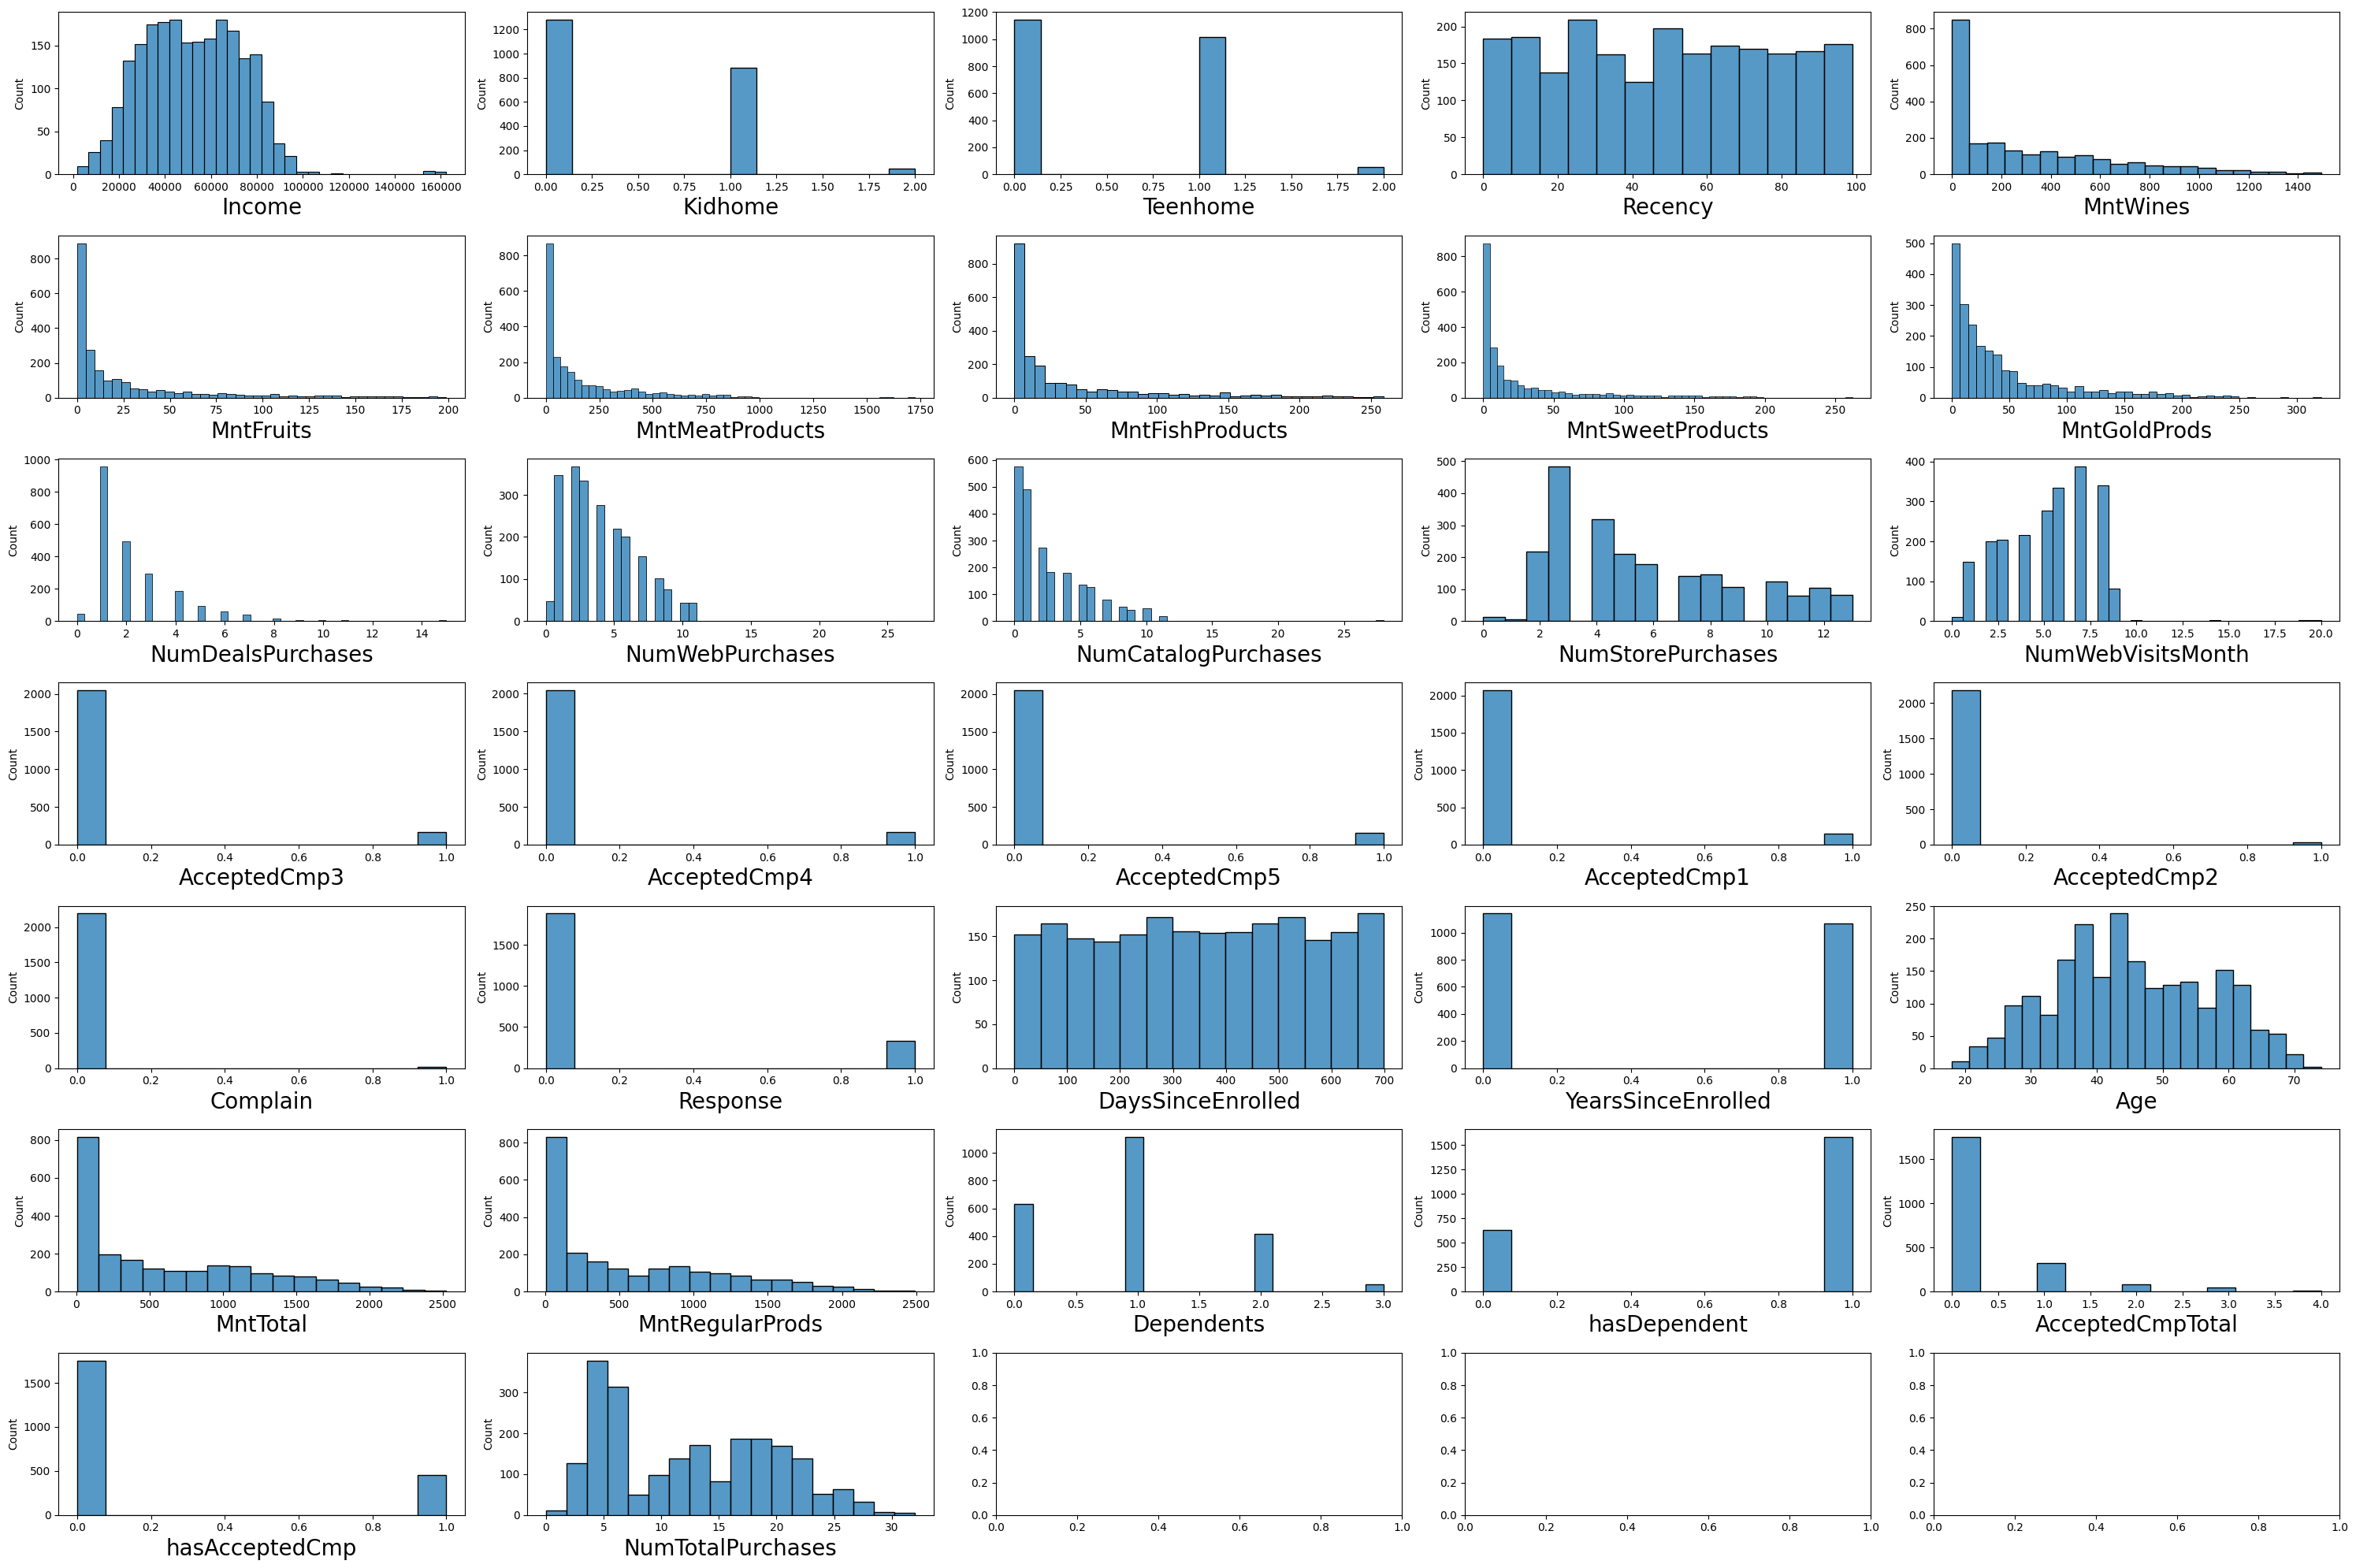

In [6]:
number_numerical_features = len(numerical_features)
ncols = 5
nrows = number_numerical_features // ncols + (1 if number_numerical_features % 3 > 0 else 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 20), tight_layout=True)
for feature, ax in zip(numerical_features, axes.flatten()):
    sns.histplot(data=df, x=feature, ax=ax)
    ax.set_xlabel(feature, fontsize=20)

In [7]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'DaysSinceEnrolled', 'YearsSinceEnrolled',
       'Age', 'AgeGroup', 'MntTotal', 'MntRegularProds', 'Dependents',
       'hasDependent', 'AcceptedCmpTotal', 'hasAcceptedCmp',
       'NumTotalPurchases'],
      dtype='object')

In [8]:
one_hot_cols = [
    'Education',
    'Marital_Status',
    'Kidhome',
    'Teenhome',
    'AcceptedCmp3',
    'AcceptedCmp4', 
    'AcceptedCmp5', 
    'AcceptedCmp1', 
    'AcceptedCmp2',
    'Complain',
    'Response', 
    'hasDependent', 
    'hasAcceptedCmp', 
    'AgeGroup'
]

standard_scaler_cols = [
    'Income',
    'Age',
    'NumTotalPurchases'
]

power_cols = [
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts',
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds',
    'MntTotal', 
    'MntRegularProds',
    'NumDealsPurchases', 
    'NumWebPurchases', 
    'NumCatalogPurchases',
    'NumStorePurchases', 
    'NumWebVisitsMonth'
]

min_max_scaler_cols = [
    'Recency',
    'DaysSinceEnrolled',
    'YearsSinceEnrolled',
    'Dependents',
    'AcceptedCmpTotal'
]

In [9]:
preprocessing = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), one_hot_cols),
        ('standard', StandardScaler(), standard_scaler_cols),
        ('min_max', MinMaxScaler(), min_max_scaler_cols),
        ('power', PowerTransformer(), power_cols)
    ]
)

df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out()
)

In [10]:
df_scaled_not_ohe = df_scaled.loc[:, ~df_scaled.columns.str.startswith('one')]

## Transformed numerical features

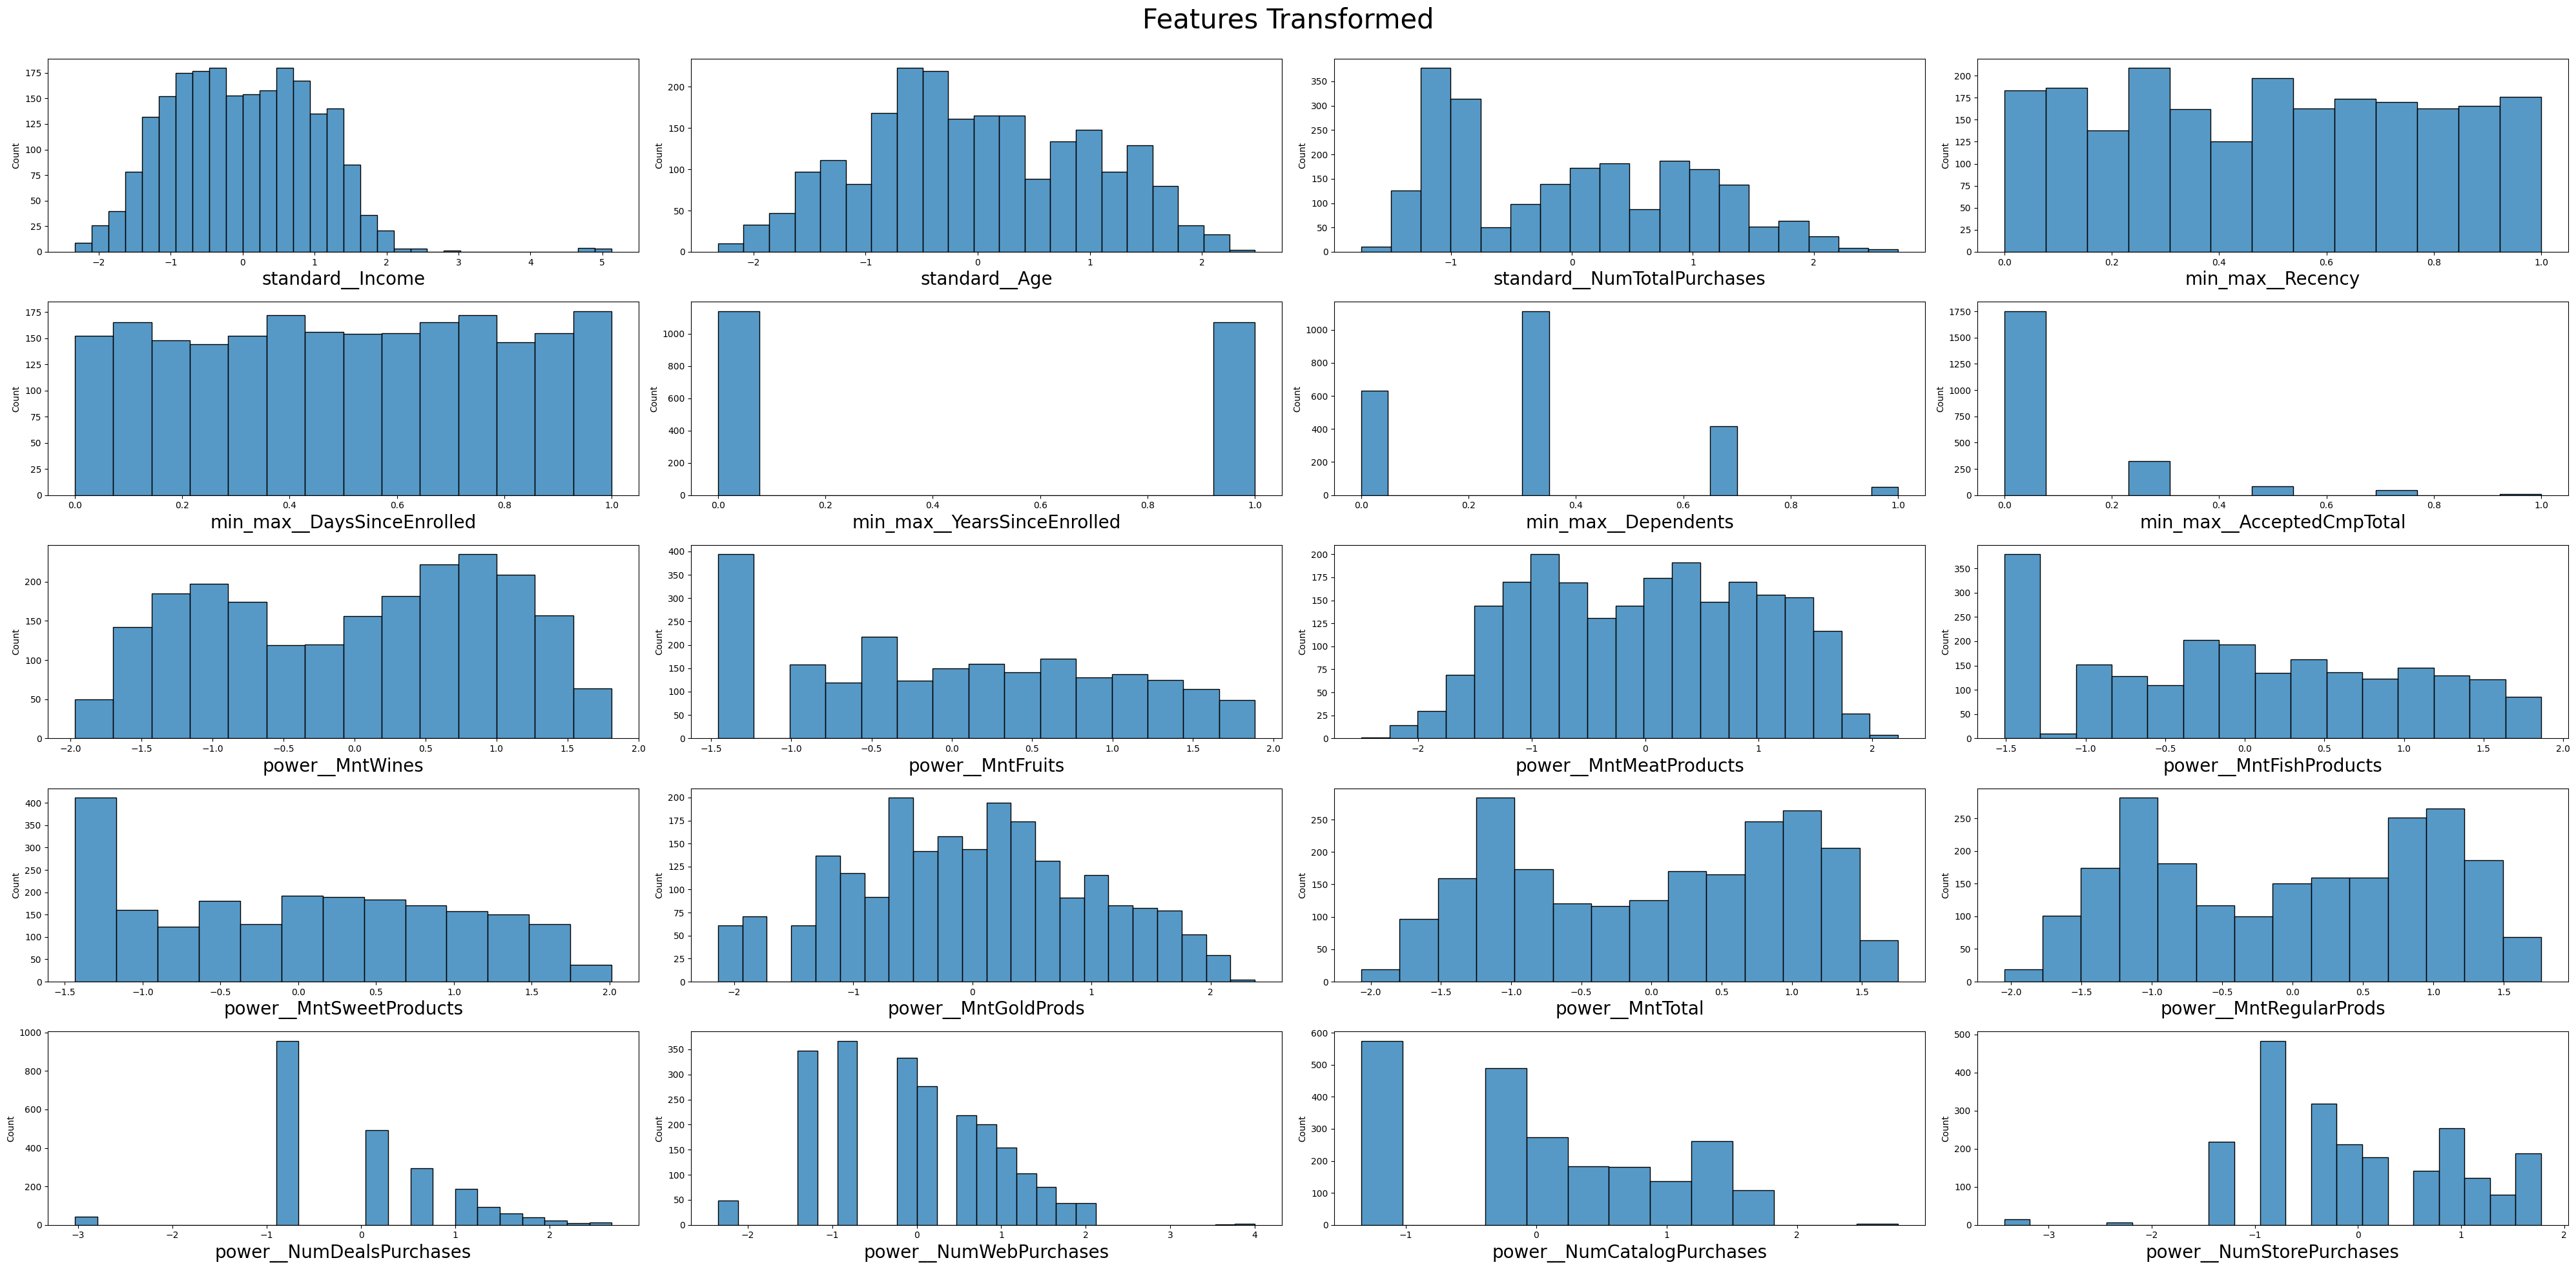

In [11]:
numerical_feature = df_scaled_not_ohe.columns
number_numerical_features = len(numerical_feature)
ncols = 4
nrows = number_numerical_features // ncols + (1 if number_numerical_features % 3 > 0 else 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, 20), tight_layout=True)
for feature, ax in zip(numerical_feature, axes.flatten()):
    sns.histplot(data=df_scaled_not_ohe, x=feature, ax=ax)
    ax.set_xlabel(feature, fontsize=20)

fig.suptitle('Features Transformed\n', fontsize=30);

## Using silhouette score and elbow method to define number of clusters

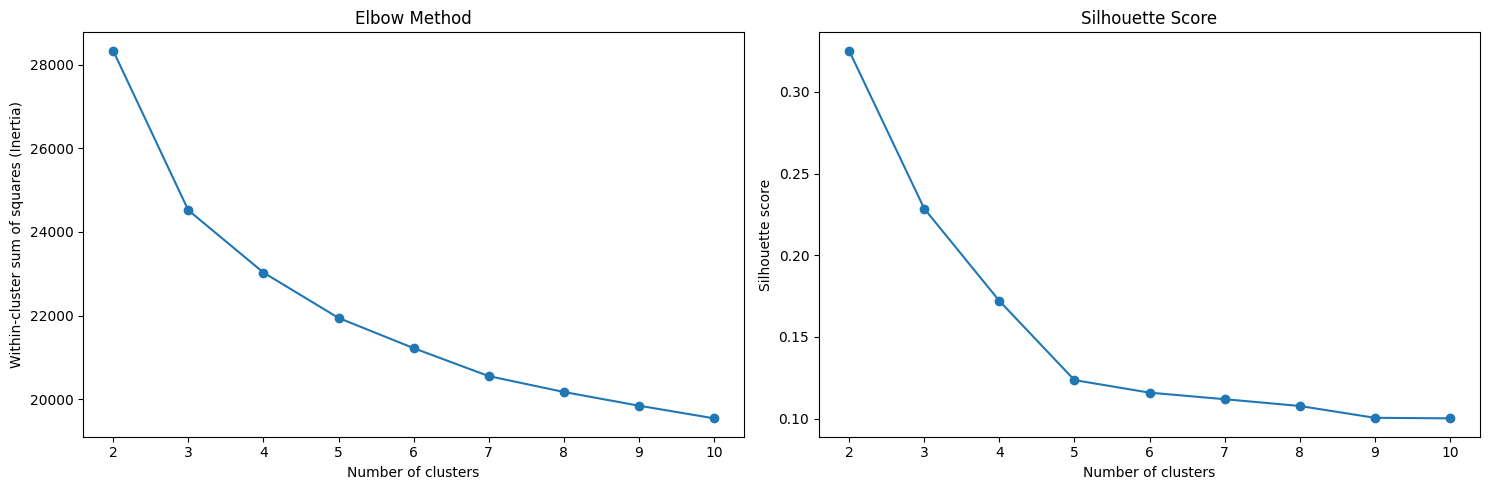

In [14]:
fig = elbow_and_silhouete_charts(dataframe=df_scaled);

- segmentation could happen with 3 clusters, as elbow method indicates and silhouette is still considered 'high'

## Creating and fitting the pipeline with KMeans

In [19]:
pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('clustering', KMeans(n_clusters=3, random_state=42, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'Kidhome',
                                                   'Teenhome', 'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2', 'Complain',
                                                   'Response', 'hasDependent',
                                                   'hasAcceptedCmp',
                                                   'AgeGroup']),
                                                 ('standard', StandardScaler(),
                                                  ['Income', 'Age',
                                                   'NumTotalPur...
                                                   'Dependents',
                                                   'AcceptedCmpTotal']),
                                                 ('power', PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds', 'MntTotal',
                                                   'MntRegularProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth'])])),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [31]:
df_clustered = df.copy()

df_clustered['cluster'] = pipeline.named_steps['clustering'].labels_

df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Dependents,hasDependent,AcceptedCmpTotal,hasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,16-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [32]:
df_clustered['cluster'].value_counts()

cluster
1    885
0    669
2    658
Name: count, dtype: int64

## Clusters Interpretation